In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Mini Project/Datasets'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/Mini Project/Datasets/Test/freshapples/rotated_by_15_Screen Shot 2018-06-08 at 5.11.02 PM.png
/content/drive/MyDrive/Mini Project/Datasets/Test/freshapples/rotated_by_15_Screen Shot 2018-06-08 at 5.04.42 PM.png
/content/drive/MyDrive/Mini Project/Datasets/Test/freshapples/rotated_by_15_Screen Shot 2018-06-08 at 5.01.01 PM.png
/content/drive/MyDrive/Mini Project/Datasets/Test/freshapples/rotated_by_15_Screen Shot 2018-06-08 at 5.17.04 PM.png
/content/drive/MyDrive/Mini Project/Datasets/Test/freshapples/rotated_by_15_Screen Shot 2018-06-08 at 5.18.37 PM.png
/content/drive/MyDrive/Mini Project/Datasets/Test/freshapples/rotated_by_15_Screen Shot 2018-06-08 at 5.24.26 PM.png
/content/drive/MyDrive/Mini Project/Datasets/Test/freshapples/rotated_by_15_Screen Shot 2018-06-08 at 5.00.43 PM.png
/content/drive/MyDrive/Mini Project/Datasets/Test/freshapples/Screen Shot 2018-06-08 at 5.32.43 PM.png
/content/drive/MyDrive/Mini

In [2]:
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [3]:
labels = os.listdir('/content/drive/MyDrive/Mini Project/Datasets/Training')
labels


['freshapples', 'rottenapples']

In [4]:
from IPython.display import display, Image


 FRESHAPPLES


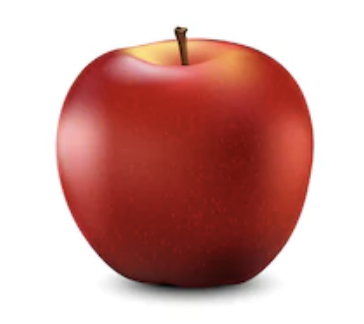

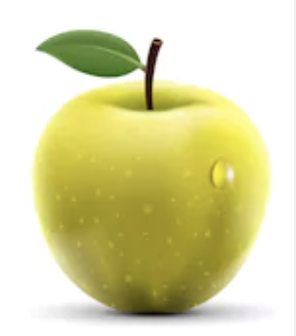

there are  404  images in  freshapples class

 ROTTENAPPLES


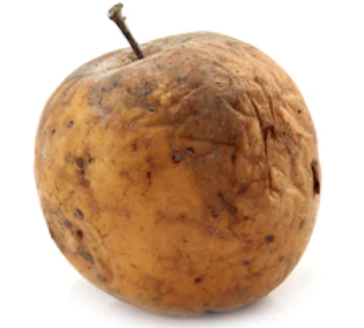

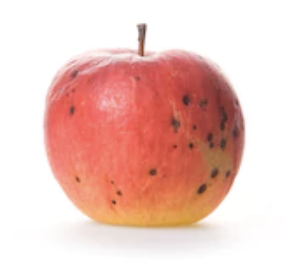

there are  614  images in  rottenapples class


In [5]:
num = []

for i in labels:
  path = '/content/drive/MyDrive/Mini Project/Datasets/Test/{0}/'.format(i)
  folder_data = os.listdir(path)
  k=0
  print('\n', i.upper())
  for j in folder_data:
    if(k<2):
      display(Image(path+j))
    k=k+1
  num.append(k)
  print('there are ', k,' images in ', i, 'class')

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
# Define constants
img_width, img_height = 224, 224
batch_size = 16
epochs = 10
num_classes = 2

In [8]:
# Define CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

In [9]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Set up data generators
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Mini Project/Datasets/Training',
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')
validation_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/Mini Project/Datasets/Test',
                                                        target_size=(img_width, img_height),
                                                        batch_size=batch_size,
                                                        class_mode='categorical')

Found 4035 images belonging to 2 classes.
Found 1018 images belonging to 2 classes.


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [12]:
# Train the model and save the history
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // batch_size,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // batch_size)

Epoch 1/10
252/252 [==============================] - 1004s 4s/step - loss: 0.4159 - accuracy: 0.8395 - val_loss: 0.4160 - val_accuracy: 0.8274
Epoch 2/10
252/252 [==============================] - 350s 1s/step - loss: 0.2511 - accuracy: 0.8985 - val_loss: 0.2167 - val_accuracy: 0.9246
Epoch 3/10
252/252 [==============================] - 357s 1s/step - loss: 0.1963 - accuracy: 0.9161 - val_loss: 0.1456 - val_accuracy: 0.9375
Epoch 4/10
252/252 [==============================] - 369s 1s/step - loss: 0.1936 - accuracy: 0.9204 - val_loss: 0.2492 - val_accuracy: 0.9256
Epoch 5/10
252/252 [==============================] - 358s 1s/step - loss: 0.1816 - accuracy: 0.9236 - val_loss: 0.1600 - val_accuracy: 0.9276
Epoch 6/10
252/252 [==============================] - 356s 1s/step - loss: 0.1510 - accuracy: 0.9373 - val_loss: 0.1545 - val_accuracy: 0.9276
Epoch 7/10
252/252 [==============================] - 349s 1s/step - loss: 0.1575 - accuracy: 0.9370 - val_loss: 0.2615 - val_accuracy: 0.898

In [13]:
# Save the model
model.save('rotten_apple_cnn.h5')

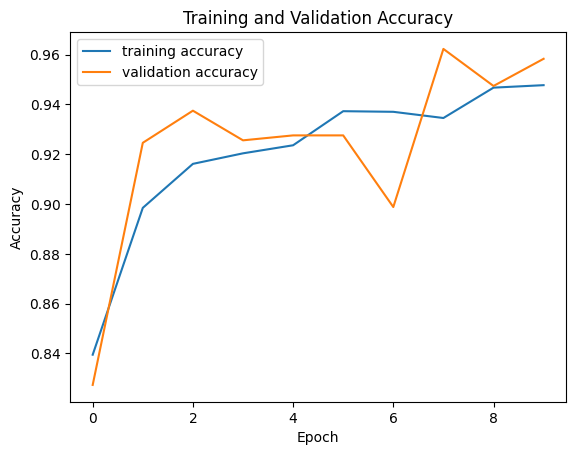

In [14]:
# Plot accuracy graph
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Text(0.5, 0, 'Epochs')

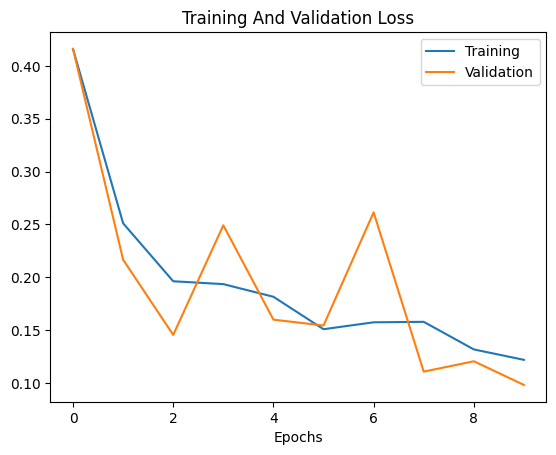

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title("Training And Validation Loss")
plt.xlabel("Epochs")